In [74]:
# Library Needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [49]:
# Load the data set
dataset = pd.read_csv('./Dataset/Social_Network_Ads.csv')

# Information about the dataset
print(dataset.head())
print("Sum of duplicated value: ", dataset.duplicated().sum())
print("Information about dataset: ")
dataset.info()

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Sum of duplicated value:  0
Information about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


We have ID for each row, and 2 numeric column, 1 category column, and Purchased column which is the target function.

All the samples are has not duplicated value.

The dataset contains 400 sample.

All the columns are Cleaned.

The dataset has 4 integer column and 1 object type.

The dataset is small so it has a small memory

In [50]:
# Describe the dataset
dataset.describe(include = 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


Gender column has 2 unique value, the top unique value is female, which is frequency by 204 times.

at the Age column, The distribution of the data is convergent and there is no skewed for a particular part.

Estimated Salary has distribution skewed to the right.

Purchased column has 2 value: 0 and 1, which is category column.

The Gender, Age and Estimated Salary columns have big difference between its scales, so the scaled is required.

In [51]:
# No need for the ID column so I will delete it
dataset.drop("User ID", axis=1, inplace=True)

# Check the columns
dataset.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Female    204
Male      196
Name: Gender, dtype: int64


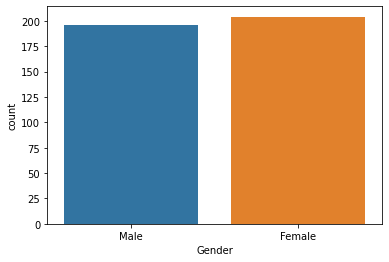

In [52]:
# Explore Category feature
print(dataset.Gender.value_counts())
sns.countplot(x='Gender',data=dataset)

Number of females are greater than that of males but the difference is not big

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CDAA80D30>,
      dtype=object)

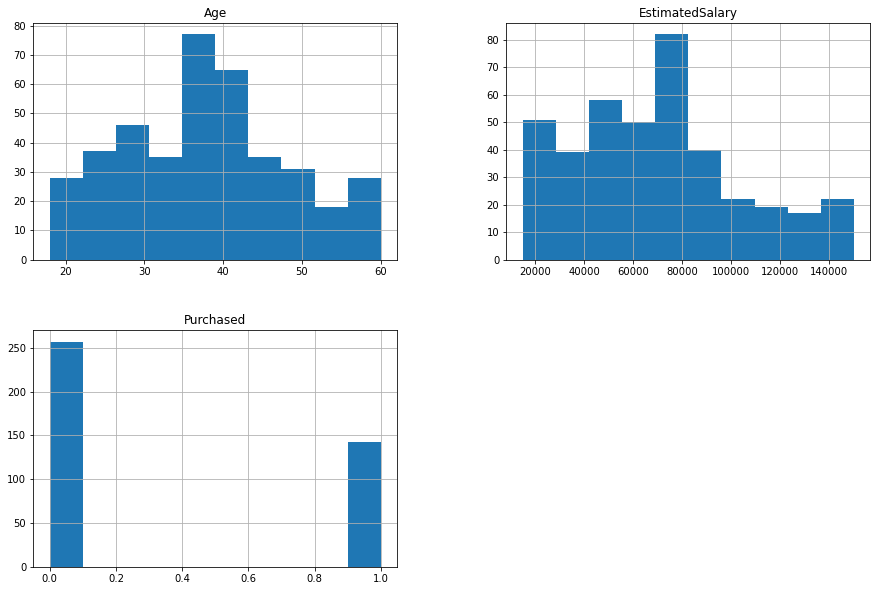

In [53]:
# Explore Numaric Columns
dataset.hist(figsize=(15,10))


Purchase which is target variable, is a category columns, and users who does not Purchased is greater than who purchased.

Ages are normally distributed around almost around 40

Estimated Salary is skewed to the right 

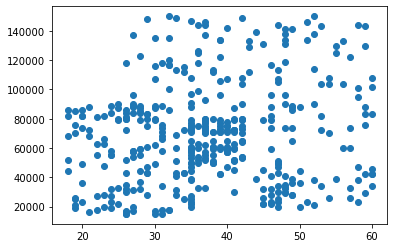

In [54]:
# The relation between Age feature and Estimated Salary feature
plt.scatter(dataset.Age, dataset.EstimatedSalary)

There is no correlation between Age and Estimated salary because we cant find a trend between them.

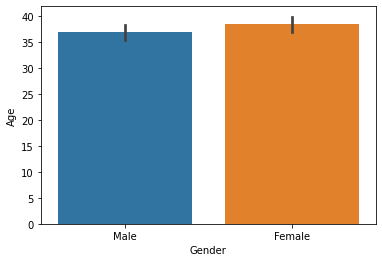

In [55]:
# The relation between Gender and Age
sns.barplot(x="Gender", y="Age", data=dataset)

The female age is greater then males age, but the difference not big

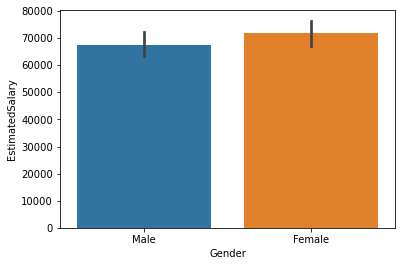

In [56]:
# The relation between Gender and EstimatedSalary
sns.barplot(x="Gender", y="EstimatedSalary", data=dataset)

The female salary is greater then males salary, but the difference not big

In [57]:
# the correlation between the numaric columns
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


There is high correlation between Age and Purchased.

There is no correlation between Age and Estimated Salary.

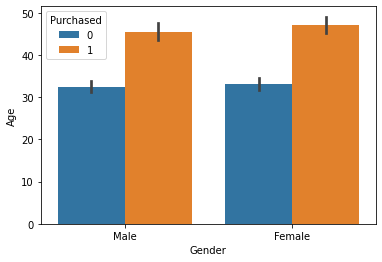

In [58]:
# Lets take a look on the relation between Gender, Age and Purchasd
sns.barplot(x="Gender", y="Age", hue="Purchased", data=dataset)

Almost older people (greater than 30 years old) are common to purchased than younger one 

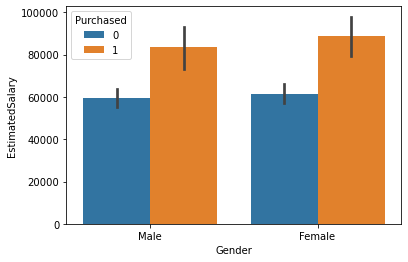

In [59]:
# Lets take a look on the relation between Gender, Es and Purchasd
sns.barplot(x="Gender", y="EstimatedSalary", hue="Purchased", data=dataset)

The females salary is greater than male allitle bit. Also, the people who earned high salary are most probably to purchased

-----------------------------------------
Encoding Categorical Variables

In [60]:
# Create Label Encoder object
Label_Encoder = LabelEncoder()

# Transform each value and re-save in the same column
dataset["Gender"] = Label_Encoder.fit_transform(dataset["Gender"])

In [61]:
# Display the head of the dataset
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


_________________________

Spliting dataset by train, test sets

In [62]:
features = dataset.iloc[:, dataset.columns != "Purchased"]
target = dataset["Purchased"]
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=100)

__________________
Scaled Dataset Using MinMaxScaler


In [66]:
# Make Min-Max-scaler object
scaler = MinMaxScaler()

# Transform the data in array, then convert to dataframe for the feature training set
feature_train = scaler.fit_transform(feature_train.to_numpy())
feature_train = pd.DataFrame(feature_train, columns=['Gender', 'Age', 'EstimatedSalary'])

# Transform the data in array, then convert to dataframe for the feature testing set
feature_test = scaler.fit_transform(feature_test.to_numpy())
feature_test = pd.DataFrame(feature_test, columns=['Gender', 'Age', 'EstimatedSalary'])

In [68]:
# Display the feature training set after scaling 
feature_train.head()

Scaled Dataset Using MinMaxScaler


,Gender,Age,EstimatedSalary
0,0.0,0.476190,0.718519
1,1.0,0.119048,0.037037
2,1.0,0.380952,0.740741
3,0.0,0.214286,0.288889
4,0.0,0.571429,0.688889


In [70]:
# Display the feature testing set after scaling
feature_test.head()

,Gender,Age,EstimatedSalary
0,1.0,0.536585,0.274074
1,1.0,0.634146,0.125926
2,0.0,0.365854,0.207407
3,0.0,0.439024,0.577778
4,0.0,0.341463,0.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CDA484400>,
      dtype=object)

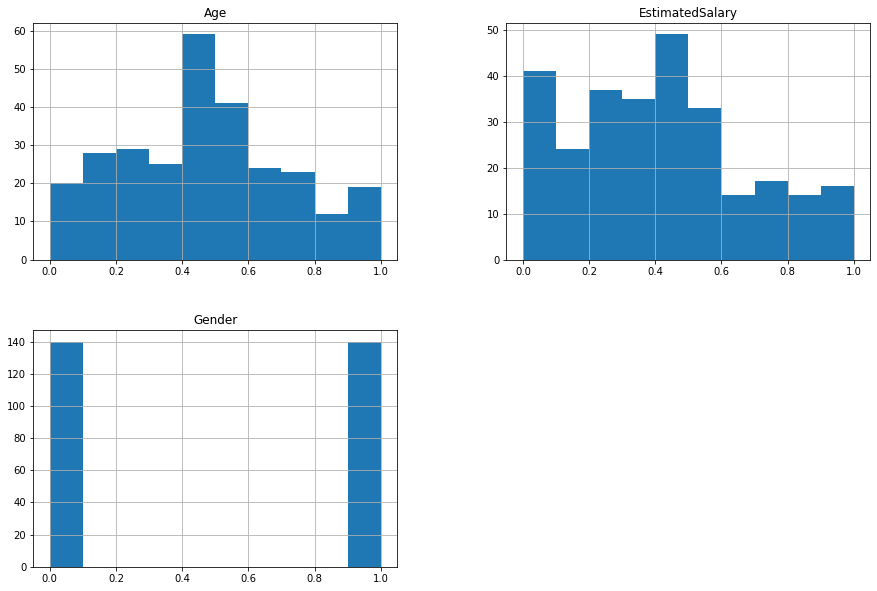

In [71]:
# Display histogram for training set after scaling
feature_train.hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CDC3EB310>,
      dtype=object)

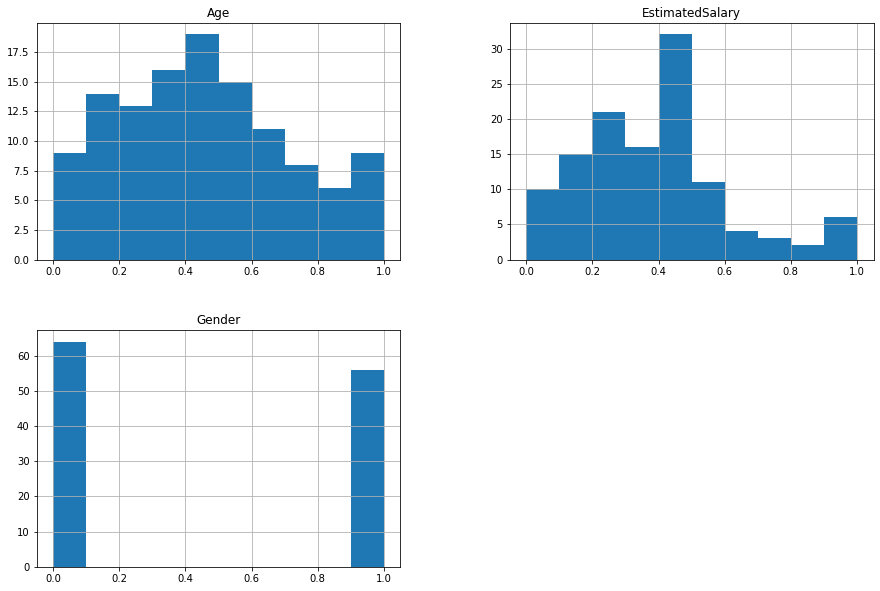

In [72]:
# Display histogram for testing set after scaling
feature_test.hist(figsize=(15,10))

__________________
Training the Logistic Regression model on the Training set

In [75]:
# Create KNN model object
knn_model = KNeighborsClassifier()

# Training the model
knn_model.fit(feature_train, target_train)

# 
target_predict = knn_model.predict(feature_test)

In [76]:
# Training score
knn_model.score(feature_train, target_train)

0.9142857142857143

In [77]:
# Testing score
knn_model.score(feature_test, target_test)

0.9166666666666666

In [78]:
# Overall accuracy score
accuracy_score(target_test, target_predict)

0.9166666666666666